In [1]:
import pandas as pd
pd.options.mode.chained_assignment = None 
import numpy as np
import matplotlib.pyplot as plt

In [2]:
fileMap = ['20130606.txt',
          '20130607.txt',
          '20130608.txt',
          '20130609.txt',
          '20130610.txt',
          '20130611.txt',
          '20130612.txt']


filePath = 'data/trainingData/';
names = ['clk.', 'conv.', 'imp.']

train = [0,2,3,4,6]
test = [1,5]

trainNames = []
testNames = []
for i in range(len(names)):
    for j in range(len(train)):
         trainNames.append( filePath + names[i] + fileMap[train[j]] )
    for j in range(len(test)):
         testNames.append( filePath + names[i] + fileMap[test[j]] )
    

dataframes = (pd.read_csv(i, header=None, sep='\\t', engine='python') for i in testNames)
testingSet = pd.concat(dataframes, ignore_index=True)

In [3]:
dataframes = (pd.read_csv(i, header=None, sep='\\t', engine='python') for i in trainNames)
combined_trainingSet = pd.concat(dataframes, ignore_index=True)

In [4]:
combined_trainingSet.columns=["Bid_Id", "Timestamp", "LogType", "iPinYouId", "userAgent", "ip", "regionId", "cityId", "adExchange", "domain", "url", "anonymousUrl", "adSlotId", "adSlotWidth", "adSlotHeight", "adSlotVisibility", "adSlotFormat", "adSlotFloorPrice", "creativeId", "biddingPrice", "payingPrice", "landingPageUrl", "advertiserId", "userProfileIds"]
testingSet.columns=["Bid_Id", "Timestamp", "LogType", "iPinYouId", "userAgent", "ip", "regionId", "cityId", "adExchange", "domain", "url", "anonymousUrl", "adSlotId", "adSlotWidth", "adSlotHeight", "adSlotVisibility", "adSlotFormat", "adSlotFloorPrice", "creativeId", "biddingPrice", "payingPrice", "landingPageUrl", "advertiserId", "userProfileIds"]
testingSet["adSlotDim"]=testingSet["adSlotWidth"].astype(str) + ',' + testingSet["adSlotHeight"].astype(str)
combined_trainingSet["adSlotDim"]=combined_trainingSet["adSlotWidth"].astype(str) + ',' + combined_trainingSet["adSlotHeight"].astype(str)

testingSet["hour"]=testingSet["Timestamp"].astype(int) % 1000000000 // 10000000
combined_trainingSet["hour"]=combined_trainingSet["Timestamp"].astype(int) % 1000000000 // 10000000
combined_trainingSet.head()

,Bid_Id,Timestamp,LogType,iPinYouId,userAgent,ip,regionId,cityId,adExchange,domain,...,adSlotFormat,adSlotFloorPrice,creativeId,biddingPrice,payingPrice,landingPageUrl,advertiserId,userProfileIds,adSlotDim,hour
0,c7654fe86bc7f66d75242d5e12a6aad4,20130606000110312,2,Vh1OPiSeP2kfQGj,Mozilla/5.0 (Windows NT 6.1) AppleWebKit/537.1...,49.223.203.*,40,42,1,trqRTvpogNlyDok4JKTI,...,1,0,c938195f9e404b4f38c7e71bf50263e5,238,0,a3becb967c015e9acb5e72f22b100ef8,3476,"10006,10063,10076,13403,10075,10110","950,90",0
1,82d22846bc757857f11064c60e8a0f3b,20130606000110864,2,Vh111kuiLlaWqG8,Mozilla/5.0 (Linux; U; Android 4.0.4; zh-cn; 7...,110.17.170.*,27,29,1,2h5wl5SvdNmRaqKbu-,...,1,0,d881a6c788e76c2c27ed1ef04f119544,227,0,d29e59bf0f7f8243858b8183f14d4412,3358,"10006,10063,10024","300,250",0
2,6ad8bc340c03cbcf6a5bd1f9d20ce07d,20130606000111403,2,Vhkr1vTlOt56qfn,K-TouchC986t_TD/1.0 Android 4.0.3 Release/10.0...,183.7.247.*,216,221,1,5Sc-GxfIL5scFsf,...,1,0,ff5123fb9333ca095034c62fdaaf51aa,300,0,361e128affece850342293213691a043,3386,10063,"336,280",0
3,22bbc00c2db42aa8a60497028845e85f,20130606000119661,2,Vh1DCnKPDvuLqOE,Mozilla/5.0 (Linux; U; Android 3.2; zh-cn; Ide...,123.144.19.*,275,275,1,trqRTu1uGTdUgNK4wJB,...,5,0,d881a6c788e76c2c27ed1ef04f119544,227,0,d29e59bf0f7f8243858b8183f14d4412,3358,"13042,10063,10052,11423,13866,10111","300,250",0
4,47e7c5523cbda762a7c00e0c47c41993,20130606000120463,2,Vhk7ZApCP4BWjgk,MQQBrowser/43 Mozilla/5.0 (iPhone 5ATT; CPU iP...,14.212.204.*,216,222,1,erdbexb0gI5RgsxfU11_qxMzmw,...,5,0,00fccc64a1ee2809348509b7ac2a97a5,227,0,b2e35064f3549d447edbbdfb1f707c8c,3427,NaN,"300,250",0


In [5]:
combinedDim = pd.concat([combined_trainingSet.adSlotDim, testingSet.adSlotDim])
dimUnique = combinedDim.unique()
combinedLanding = pd.concat([combined_trainingSet.landingPageUrl, testingSet.landingPageUrl])
landingUnique = combinedLanding.unique()

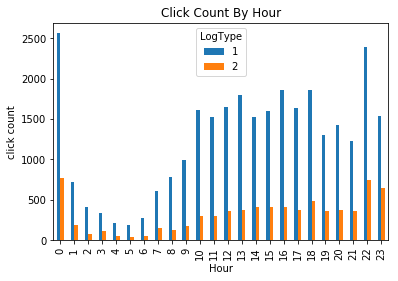

In [6]:
pd.crosstab(combined_trainingSet.hour, combined_trainingSet.LogType).plot(kind='bar')
plt.title('Click Count By Hour')
plt.xlabel('Hour')
plt.ylabel('click count')
plt.savefig('clickCountByHour')

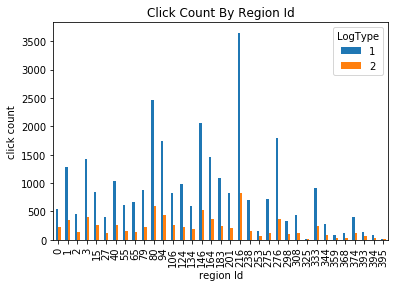

In [7]:
pd.crosstab(combined_trainingSet.regionId, combined_trainingSet.LogType).plot(kind='bar')
plt.title('Click Count By Region Id')
plt.xlabel('region Id')
plt.ylabel('click count')
plt.savefig('clickCountByRegionId')

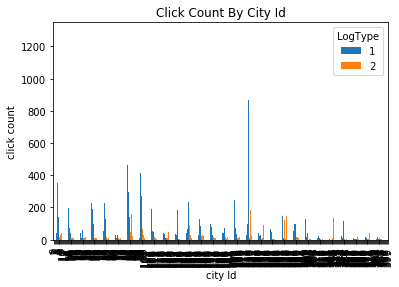

In [8]:
pd.crosstab(combined_trainingSet.cityId, combined_trainingSet.LogType).plot(kind='bar')
plt.title('Click Count By City Id')
plt.xlabel('city Id')
plt.ylabel('click count')
plt.savefig('clickCountByCityId')

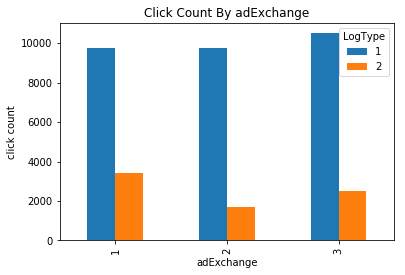

In [9]:
pd.crosstab(combined_trainingSet.adExchange, combined_trainingSet.LogType).plot(kind='bar')
plt.title('Click Count By adExchange')
plt.xlabel('adExchange')
plt.ylabel('click count')
plt.savefig('clickCountByadExchange')

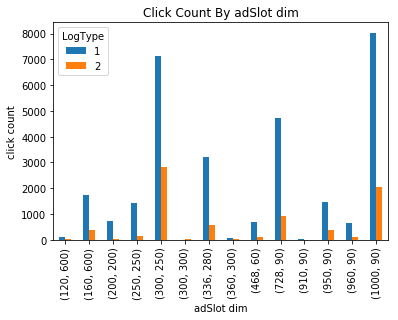

In [10]:
pd.crosstab([combined_trainingSet.adSlotWidth, combined_trainingSet.adSlotHeight], combined_trainingSet.LogType).plot(kind='bar')
plt.title('Click Count By adSlot dim')
plt.xlabel('adSlot dim')
plt.ylabel('click count')
plt.savefig('clickCountByadSlotDim')

### Ad slot visibility 
Ad Slot Visibility Column represent whether the ad slot is above the fold (1), below the fold (2), or unknown (0). 

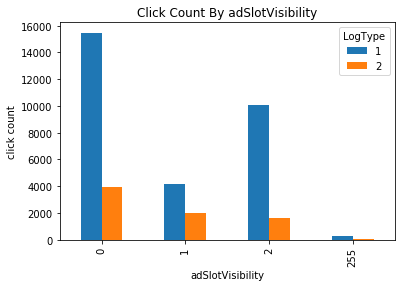

In [11]:
pd.crosstab(combined_trainingSet.adSlotVisibility, combined_trainingSet.LogType).plot(kind='bar')
plt.title('Click Count By adSlotVisibility')
plt.xlabel('adSlotVisibility')
plt.ylabel('click count')
plt.savefig('clickCountByadSlotVisibility')


### Ad Slot Format
Ad slot format is either fixed ad slot (1) or the popup window (2).

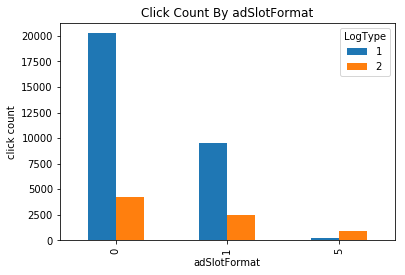

In [12]:
pd.crosstab(combined_trainingSet.adSlotFormat, combined_trainingSet.LogType).plot(kind='bar')
plt.title('Click Count By adSlotFormat')
plt.xlabel('adSlotFormat')
plt.ylabel('click count')
plt.savefig('clickCountByadSlotFormat')

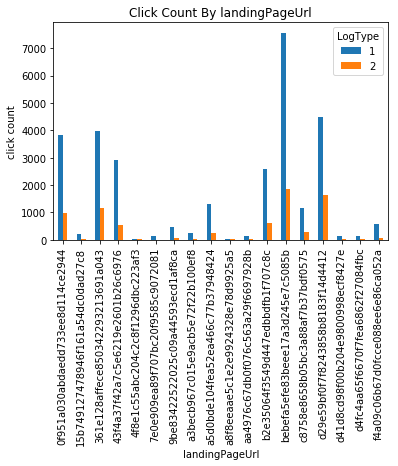

In [13]:
pd.crosstab(combined_trainingSet.landingPageUrl, combined_trainingSet.LogType).plot(kind='bar')
plt.title('Click Count By landingPageUrl')
plt.xlabel('landingPageUrl')
plt.ylabel('click count')
plt.savefig('clickCountBylandingPageUrl')

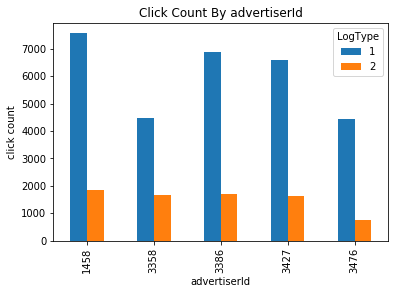

In [14]:
pd.crosstab(combined_trainingSet.advertiserId, combined_trainingSet.LogType).plot(kind='bar')
plt.title('Click Count By advertiserId')
plt.xlabel('advertiserId')
plt.ylabel('click count')
plt.savefig('clickCountByadvertiserId')

In [15]:
userProfileMapping = pd.read_csv('data/user.profile.tags.en.txt', header=None, sep='\\t', engine='python')
userProfileMapping.columns = ["userProfileId", "userProfileName"]
userProfileMapping

,userProfileId,userProfileName
0,10006,Long-term interest/news
1,10024,Long-term interest/eduation
2,10031,Long-term interest/automobile
3,10048,Long-term interest/real estate
4,10052,Long-term interest/IT
5,10057,Long-term interest/electronic game
6,10059,Long-term interest/fashion
7,10063,Long-term interest/entertainment
8,10067,Long-term interest/luxury
9,10074,Long-term interest/home and lifestyle


In [16]:
userProfileDict = {}
for index,record in userProfileMapping.iterrows():
    userProfileDict[record['userProfileId']] = record['userProfileName']

In [17]:
userProfileDf = pd.DataFrame({},columns = userProfileMapping.userProfileName.values)
otherColumns = pd.DataFrame({},columns=["regionId", "cityId", "adExchange", "adSlotDimension", "adSlotVisibility", "adSlotFormat","landingPageURL", "advertiserId", "logType", "hour"])
trainingData = pd.concat([userProfileDf,otherColumns], sort=True)

In [18]:
adSlotDict = {}
for i in range(len(dimUnique)):
     adSlotDict[dimUnique[i]] = i
adSlotDict

{'950,90': 0,
 '300,250': 1,
 '336,280': 2,
 '1000,90': 3,
 '728,90': 4,
 '250,250': 5,
 '160,600': 6,
 '960,90': 7,
 '468,60': 8,
 '200,200': 9,
 '910,90': 10,
 '120,600': 11,
 '360,300': 12,
 '300,300': 13}

In [19]:
landingDict = {}
for i in range(len(landingUnique)):
     landingDict[landingUnique[i]] = i
landingDict

{'a3becb967c015e9acb5e72f22b100ef8': 0,
 'd29e59bf0f7f8243858b8183f14d4412': 1,
 '361e128affece850342293213691a043': 2,
 'b2e35064f3549d447edbbdfb1f707c8c': 3,
 'c8758e8658b05bc3a88af7b37bdf0575': 4,
 'bebefa5efe83beee17a3d245e7c5085b': 5,
 'a5d0bde104fea52ea466c77b37948424': 6,
 '9be83422522025c09a44593ecd1af8ca': 7,
 '43f4a37f42a7c5e6219e2601b26c6976': 8,
 'd4fc4aa65f6670f7fea6862f27084fbc': 9,
 'f4a09c06b67d0fcce088ee6e86ca052a': 10,
 'a8f8eeaae5c1e2e9924328e78d9925a5': 11,
 'aa4976c67db0f076c563a29f6697928b': 12,
 '4f8e1c55abc204c2c8f1296dbc223af3': 13,
 '7e0e909ea89f707bc20f9585c9072081': 14,
 '15b749127478946f161a54dc0dad27c8': 15,
 '0f951a030abdaedd733ee8d114ce2944': 16,
 'd41d8cd98f00b204e9800998ecf8427e': 17}

In [20]:
for index,record in combined_trainingSet.iterrows():
    trainingData.loc[index]=[0,0,0,0,0,0,0,0,0,0,
                             0,0,0,0,0,0,0,0,0,0,
                             0,0,0,0,0,0,0,0,0,0,
                             0,0,0,0,0,0,0,0,0,0,
                             0,0,0,0, 
                             record["adExchange"],
                             adSlotDict[record["adSlotDim"]],
                             record["adSlotFormat"],
                             record["adSlotVisibility"],
                             record["advertiserId"],
                             record["cityId"],
                             record["hour"],
                             landingDict[record["landingPageUrl"]],
                             record["LogType"],
                             record["regionId"]]
    upIds = record.userProfileIds
    if isinstance(upIds, str):
        profileIds = upIds.split(",")
        for id in profileIds:
            userProfileName=userProfileDict[int(id)]
            trainingData.iloc[index][userProfileName]=1

trainingData.head()

,Demographic/gender/famale,Demographic/gender/male,In-market/3c product,In-market/Beauty& Personal Care,In-market/appliances,In-market/automobile,In-market/book,In-market/clothing、shoes&bags,In-market/education,In-market/electronic game,...,adExchange,adSlotDimension,adSlotFormat,adSlotVisibility,advertiserId,cityId,hour,landingPageURL,logType,regionId
0,0,1,0,0,0,0,0,0,0,0,...,1,0,1,2,3476,42,0,0,2,40
1,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,3358,29,0,1,2,27
2,0,0,0,0,0,0,0,0,0,0,...,1,2,1,1,3386,221,0,2,2,216
3,1,0,0,0,0,1,0,0,0,0,...,1,1,5,1,3358,275,0,1,2,275
4,0,0,0,0,0,0,0,0,0,0,...,1,1,5,1,3427,222,0,3,2,216


In [21]:
testingData = pd.DataFrame({},columns = trainingData.columns.values)

In [22]:
for index,record in testingSet.iterrows():
    testingData.loc[index]=[0,0,0,0,0,0,0,0,0,0,
                             0,0,0,0,0,0,0,0,0,0,
                             0,0,0,0,0,0,0,0,0,0,
                             0,0,0,0,0,0,0,0,0,0,
                             0,0,0,0, 
                             record["adExchange"],
                             adSlotDict[record["adSlotDim"]],
                             record["adSlotFormat"],
                             record["adSlotVisibility"],
                             record["advertiserId"],
                             record["cityId"],
                             record["hour"],
                             landingDict[record["landingPageUrl"]],
                             record["LogType"],
                             record["regionId"]]
    upIds = record.userProfileIds
    if isinstance(upIds, str):
        profileIds = upIds.split(",")
        for id in profileIds:
            if int(id) in userProfileDict.keys():
                userProfileName=userProfileDict[int(id)]
                testingData.iloc[index][userProfileName]=1

testingData.head()

,Demographic/gender/famale,Demographic/gender/male,In-market/3c product,In-market/Beauty& Personal Care,In-market/appliances,In-market/automobile,In-market/book,In-market/clothing、shoes&bags,In-market/education,In-market/electronic game,...,adExchange,adSlotDimension,adSlotFormat,adSlotVisibility,advertiserId,cityId,hour,landingPageURL,logType,regionId
0,0,0,0,0,0,0,0,0,0,0,...,2,1,0,1,3427,217,0,3,2,216
1,0,1,0,0,0,0,0,0,0,0,...,2,11,0,1,3386,243,0,2,2,238
2,0,0,0,0,0,0,0,0,0,0,...,2,9,0,1,3358,228,0,1,2,216
3,0,1,0,0,0,0,0,0,0,0,...,2,6,0,2,1458,83,0,5,2,80
4,0,0,0,0,0,0,0,0,0,0,...,2,1,0,1,3427,41,0,3,2,40


### Training Data

In [23]:
yTrain = trainingData[['logType']]
yTrain = np.ravel(yTrain)
yTrain = yTrain.astype('int')
xTrain = trainingData.copy()
xTrain = trainingData.drop(columns=['logType'])

### Testing Data

In [24]:
yTest = testingData[['logType']]
yTest = np.ravel(yTest)
yTest = yTest.astype('int')
xTest = testingData.copy()
xTest = testingData.drop(columns=['logType'])

### Logistic Regression

#### Model Fitting

In [25]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
clf.fit(xTrain, yTrain)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

#### Prediction 

In [26]:
yPred = clf.predict(xTest)

#### Metrics

In [27]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(yTest, yPred)
print("Logistic Regression Accuracy score:", accuracy)

Logistic Regression Accuracy score: 0.8831247476786436


#### Probability For Logistic Regression Test Values

In [28]:
yProb = clf.predict_proba(xTest)
yProb

array([[0.89111182, 0.10888818],
       [0.92450487, 0.07549513],
       [0.90057016, 0.09942984],
       ...,
       [0.84375121, 0.15624879],
       [0.85067322, 0.14932678],
       [0.8574104 , 0.1425896 ]])

#### Confusion Matrix

In [29]:
import itertools
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

#### Logistic Regression Confusion Matrix 

Confusion matrix, without normalization


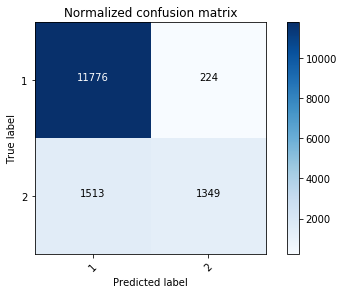

In [30]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(yTest, yPred)
plot_confusion_matrix(confusion_matrix, classes=['1','2'], normalize=False,
                      title='Normalized confusion matrix')
plt.show()

### Decision Tree

#### Model Fitting

In [31]:
from sklearn.tree import DecisionTreeClassifier  
classifier = DecisionTreeClassifier()  
classifier.fit(xTrain, yTrain) 

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

#### Prediction 

In [32]:
yPredDecisionTree = classifier.predict(xTest)

#### Metrics

In [33]:
from sklearn.metrics import accuracy_score
from sklearn import metrics  
accuracyDecisionTree = accuracy_score(yTest, yPredDecisionTree)
print("Decision Tree Accuracy score:", accuracyDecisionTree)
print('Decision Tree Mean Absolute Error:', metrics.mean_absolute_error(yTest, yPredDecisionTree))  
print('Decision Tree Mean Squared Error:', metrics.mean_squared_error(yTest, yPredDecisionTree))  
print('Decision Tree Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(yTest, yPredDecisionTree)))  

Decision Tree Accuracy score: 0.835553761270354
Decision Tree Mean Absolute Error: 0.1644462387296461
Decision Tree Mean Squared Error: 0.1644462387296461
Decision Tree Root Mean Squared Error: 0.4055197143538722


#### Probability of Prediction

In [65]:
yProb = classifier.predict_proba(xTest)
unique_rows = np.unique(yProb, axis=0)
#yProb[:,0].unique
unique_rows

array([[0.        , 1.        ],
       [0.33333333, 0.66666667],
       [0.5       , 0.5       ],
       [0.66666667, 0.33333333],
       [1.        , 0.        ]])

#### Decision Tree Confusion Matrix 

Confusion matrix, without normalization


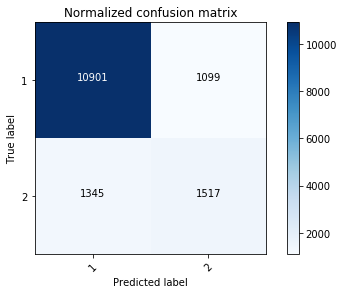

In [38]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(yTest, yPredDecisionTree)
plot_confusion_matrix(confusion_matrix, classes=['1','2'], normalize=False,
                      title='Normalized confusion matrix')
plt.show()

In [74]:
def visualize_tree(tree, feature_names):
    """Create tree png using graphviz.

    Args
    ----
    tree -- scikit-learn DecsisionTree.
    feature_names -- list of feature names.
    """
    with open("dt.dot", 'w') as f:
        export_graphviz(tree, out_file=f,
                        feature_names=feature_names)

    command = ["dot", "-Tpng", "dt.dot", "-o", "dt.png"]
    try:
        subprocess.check_call(command)
    except:
        exit("Could not run dot, ie graphviz, to "
             "produce visualization")

In [75]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
visualize_tree(classifier, xTrain.columns)

# after this command runs:
# brew install graphviz
# dot -Tpdf dt.dot -o decisionTree.pdf

### Gradient Boost

#### Model Fitting

In [34]:
from sklearn import ensemble
params = {'n_estimators': 1200, 'max_depth': 3, 'subsample': 0.5,
          'learning_rate': 0.05, 'min_samples_leaf': 1, 'random_state': 3}
gbclf = ensemble.GradientBoostingClassifier(**params)
gbclf.fit(xTrain, yTrain)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.05, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=1200,
              presort='auto', random_state=3, subsample=0.5, verbose=0,
              warm_start=False)

#### Prediction 

In [35]:
yPredGradientBoosting = gbclf.predict(xTest)

#### Metrics

In [36]:
accuracyGradientBoosting = accuracy_score(yTest, yPredGradientBoosting)
print("Gradient Boosting Accuracy score:", accuracyGradientBoosting)

Gradient Boosting Accuracy score: 0.8909298883057462


#### Probability of Prediction

In [46]:
yProb = gbclf.predict_proba(xTest)
yProb

array([[0.78493121, 0.21506879],
       [0.83980033, 0.16019967],
       [0.98037928, 0.01962072],
       ...,
       [0.73616043, 0.26383957],
       [0.97538605, 0.02461395],
       [0.83913355, 0.16086645]])

#### Gradient Boosting Confusion Matrix 

Confusion matrix, without normalization


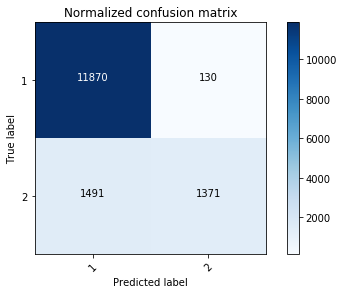

In [39]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(yTest, yPredGradientBoosting)
plot_confusion_matrix(confusion_matrix, classes=['1','2'], normalize=False,
                      title='Normalized confusion matrix')
plt.show()

### Top coefficients

#### Logistic Regression

In [133]:
coef = np.exp(clf.coef_).tolist()

b=[]
for i in range(len(coef[0])):
    b.append([coef[0][i]])
df = pd.DataFrame(b, columns=['coef'])
df['vectors']=xTest.columns
# using the mode as default value
df["default"]=0
df
dfMode = xTrain.mode()
for i in range(len(df)):
    df["default"].iloc[[i]]=dfMode.iloc[0][i]
# df[df.columns[1:3]]
df.sort_values(by=['coef'], ascending=False)




,coef,vectors,default
7,326.682297,In-market/clothing、shoes&bags,0
5,41.855441,In-market/automobile,0
2,28.408696,In-market/3c product,0
46,1.826257,adSlotFormat,0
44,1.507131,adExchange,1
11,1.401312,In-market/food&drink,0
3,1.382195,In-market/Beauty& Personal Care,0
23,1.353840,Long-term interest/IT,0
9,1.215326,In-market/electronic game,0
13,1.206584,In-market/household&home improvement,0


In [123]:
xTrain.adExchange.unique()

array([1, 3, 2], dtype=object)

In [124]:
xTrain.adSlotFormat.unique()

array([1, 5, 0], dtype=object)

In [127]:
xTrain.advertiserId.unique()

array([3476, 3358, 3386, 3427, 1458], dtype=object)